In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df_original = pd.read_csv('student-total.csv')
df_original

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1039,MS,F,19,R,GT3,T,2,3,services,...,5,4,2,1,2,5,4,10,11,10
1040,1040,MS,F,18,U,LE3,T,3,1,teacher,...,4,3,4,1,1,1,4,15,15,16
1041,1041,MS,F,18,U,GT3,T,1,1,other,...,1,1,1,1,1,5,6,11,12,9
1042,1042,MS,M,17,U,LE3,T,3,1,services,...,2,4,5,3,4,2,6,10,10,10


<Axes: >

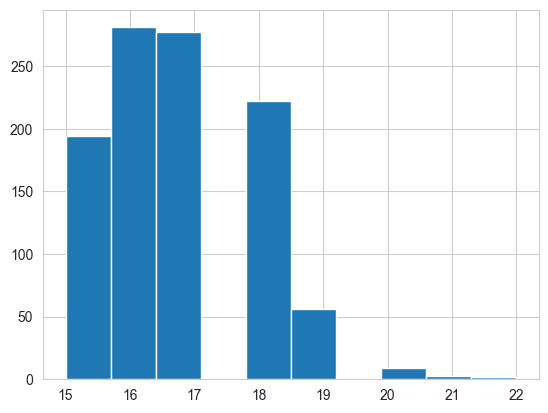

In [3]:
df_original['age'].hist()

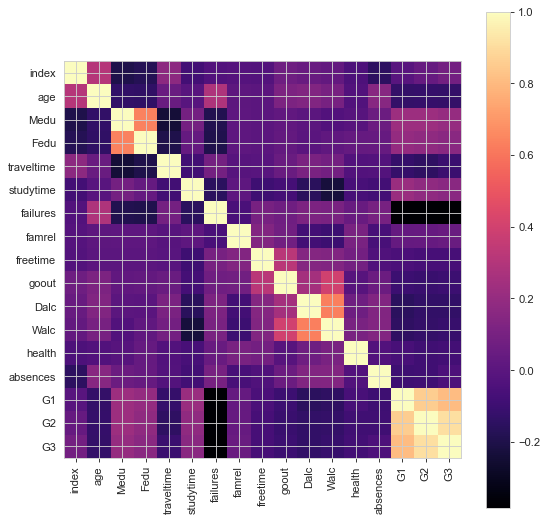

In [52]:
# Correlation matrix
df_original = df_original.select_dtypes(exclude=["object"])
matrix = df_original.corr()

plt.figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
corrMatrix = plt.matshow(matrix, fignum=1, cmap='magma')
plt.xticks(range(len(matrix.columns)), matrix.columns, rotation=90)
plt.yticks(range(len(matrix.columns)), matrix.columns)
plt.gca().xaxis.tick_bottom()

plt.colorbar(corrMatrix)
plt.show()

In [17]:
# Dataset with some uninterested features removed
df = pd.read_csv('student.csv')
df

,sex,age,famsize,Pstatus,Medu,Fedu,famrel,Mjob,Fjob,studytime,failures,higher,absences,G3,romantic,freetime,goout,health,Dalc,Walc
0,F,18,GT3,A,4,4,4,at_home,teacher,2,0,yes,6,6,no,3,4,3,1,1
1,F,17,GT3,T,1,1,5,at_home,other,2,0,yes,4,6,no,3,3,3,1,1
2,F,15,LE3,T,1,1,4,at_home,other,2,3,yes,10,10,no,3,2,3,2,3
3,F,15,GT3,T,4,2,3,health,services,3,0,yes,2,15,yes,2,2,5,1,1
4,F,16,GT3,T,3,3,4,other,other,2,0,yes,4,10,no,3,2,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,F,19,GT3,T,2,3,5,services,other,3,1,yes,4,10,no,4,2,5,1,2
1040,F,18,LE3,T,3,1,4,teacher,services,2,0,yes,4,16,no,3,4,1,1,1
1041,F,18,GT3,T,1,1,1,other,other,2,0,yes,6,9,no,1,1,5,1,1
1042,M,17,LE3,T,3,1,2,services,services,1,0,yes,6,10,no,4,5,2,3,4


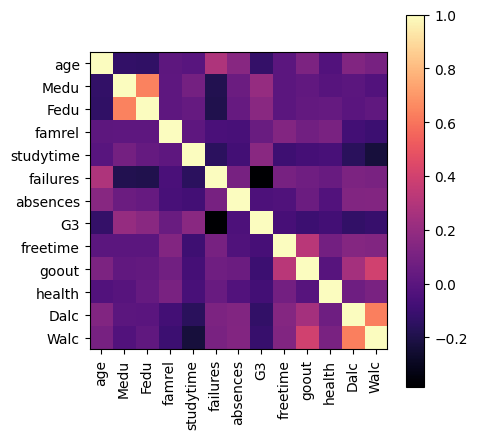

In [ ]:

# Students that normally drink on the weekend but no during the week
df[df['Dalc'] == 1]['Walc'].value_counts(normalize=True)

In [ ]:
import matplotlib.pyplot as plt

sns.set_palette("Reds", 5)

subset_df = df[['Walc', 'Dalc']].copy()

count_df = subset_df.melt().groupby(['variable', 'value']).size().unstack()

ax = count_df.plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center', va='center')

plt.title('Stacked Bar Plot for Dalc and Walc with Counts')
plt.show()

In [ ]:
sns.violinplot(df, x="sex", y="Walc", palette=sns.color_palette("RdBu", 2))

In [ ]:
from scipy.stats import chi2_contingency

# contingency_table = pd.crosstab(index = df['famrel'], columns = [df['Dalc'], df['Walc']])
contingency_table = pd.crosstab(df['studytime'], df['Walc'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)


print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

In [ ]:
from scipy.stats import chi2_contingency

# contingency_table = pd.crosstab(index = df['famrel'], columns = [df['Dalc'], df['Walc']])
contingency_table = pd.crosstab(df['studytime'], df['Dalc'])

print("Contingency Table:")
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)


print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b905a428-a314-48b4-9ed0-3b85484bcae8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>